# Quantum Fourier Transform Cross-Verification

<u>NOTE</u>: Remeber to try to hit **Restart** if something is wrong and then **Run All** again.

## Introduction
This module run experiments of QFT algorithm on different Quantum Computing platform and compare the correctness of each random input configuration to each quantum computing platform. 

Each module based on a specific quantum computing platform must implement a function such that it takes parameters:
-   A number of qubits used.
-   A random configuration of a bitstring of 0's and 1's input state.
-   A number of shots for each configuration run.

And returns:
-   A map of counts of each measurement outcome correspond to a configuration input state.

Optional: Print the circuit out in the function

This module will then demonstrate the statistic of each experiment on different type of quantum computers

## Set up


In [1]:
import random
import matplotlib.pyplot as plt
from Trapped_Ion.qft_trapped_ion import *
from Photon_Implementation.qft_photonic import *
from Superconducting.qft_super_conducting import *
from neutralAtom.qft_neutral_atom import *

func.func @hello_world(theta : !py.float) -> !Bottom {
  ^0(%hello_world_self, %theta):
  │      %0 = py.constant.constant 2 : !py.int
  │ %qubits = func.invoke qalloc(%0) : !py.IList[!py.Qubit, !Any] maybe_pure=False
  │      %1 = py.constant.constant 0 : !py.int
  │      %2 = py.indexing.getitem(%qubits, %1) : !py.Qubit
  │      %3 = func.invoke h(%2) : !py.NoneType maybe_pure=False
  │      %4 = py.constant.constant 0 : !py.int
  │      %5 = py.indexing.getitem(%qubits, %4) : !py.Qubit
  │      %6 = py.constant.constant 1 : !py.int
  │      %7 = py.indexing.getitem(%qubits, %6) : !py.Qubit
  │      %8 = func.invoke cx(%5, %7) : !py.NoneType maybe_pure=False
  │      %9 = py.constant.constant 0 : !py.int
  │     %10 = py.indexing.getitem(%qubits, %9) : !py.Qubit
  │     %11 = func.invoke rx(%theta : !py.float, %10) : !py.NoneType maybe_pure=False
  │   %bits = func.invoke measure(%qubits) : !py.MeasurementResult maybe_pure=False
  │           func.return %bits
} // func.func hello_wo

## Histogram printing function

In [2]:
def printHistogramCounts(dataset: dict, title: str):
    
    # Extract x and y
    labels = sorted(list(dataset.keys()))  
    values = [dataset[b] for b in labels]

    # Plot
    plt.figure(figsize=(6,4))
    plt.bar(labels, values)
    plt.xlabel("Bitstring |x>")
    plt.ylabel("Counts")
    plt.title(title)
    plt.xticks(rotation=75)  # rotate if needed
    plt.show()

In [ ]:
def plot_multi_histogram(result_list, device_names, title="Cross-Platform Comparison"):
    """
    result_list: list of dicts (e.g., [result_ionq, result_ibm, result_photonic])
    device_names: list of strings of same length as result_list
    """

    # Collect all possible bitstrings
    all_labels = sorted(set().union(*[res.keys() for res in result_list]))

    # Number of devices
    m = len(result_list)
    x = np.arange(len(all_labels))  # base x locations

    bar_width = 0.6 / m  # make bars thinner so they don't overlap

    plt.figure(figsize=(12, 6))  # increase figure width

    for i, res in enumerate(result_list):
        # Align counts for missing keys (put 0)
        values = [res.get(bit, 0) for bit in all_labels]

        plt.bar(
            x + i * bar_width,
            values,
            width=bar_width,
            label=device_names[i]
        )

    # Center x-ticks
    plt.xticks(x + bar_width*(m-1)/2, all_labels, rotation=45, ha='right')
    plt.ylabel("Counts")
    plt.xlabel("Bitstring |x⟩")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()


## 3-Qubit Experiment on Ideal Simulator

The configuration is [0, 0, 0]


/home/ugrads/majors/ttv27042004/CS4134/.venv/lib64/python3.11/site-packages/pennylane/devices/legacy_facade.py:177: PennyLaneDeprecationWarning: Setting shots on device is deprecated. Please use the `set_shots` transform on the respective QNode instead.
  warnings.warn(


{np.str_('000'): np.int64(136), np.str_('001'): np.int64(126), np.str_('010'): np.int64(136), np.str_('011'): np.int64(150), np.str_('100'): np.int64(115), np.str_('101'): np.int64(121), np.str_('110'): np.int64(100), np.str_('111'): np.int64(140)}
{'000': 149, '001': 121, '010': 128, '011': 125, '100': 126, '101': 138, '110': 123, '111': 114}
{'000': 142, '001': 126, '010': 122, '011': 110, '100': 129, '101': 117, '110': 132, '111': 146}
{'000': 121, '001': 106, '010': 128, '011': 143, '100': 114, '101': 130, '110': 145, '111': 137}


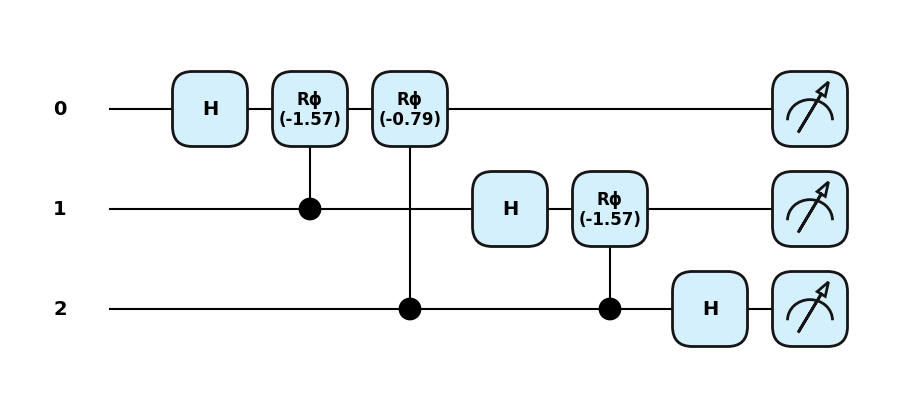

In [4]:
n = 3
config = [0] * n
shots = 1024

print(f"The configuration is {config}")

result_trapped_ion = qft_trapped_ion(n, config, shots)
result_photonic = qft_photonic(n, config, shots)
result_super_conducting = qft_super_conducting(n, config, shots)
result_neutral_atom = qft_neutral_atom(n, config, shots)

print(result_trapped_ion)
print(result_photonic)
print(result_super_conducting)
print(result_neutral_atom)

# printHistogramCounts(result_trapped_ion, "QFT Result Distribution (IonQ Trapped-ion)")
# printHistogramCounts(result_photonic, "QFT Result Distribution (Perceval Photonic)")
# printHistogramCounts(result_super_conducting, "QFT Result Distribution (IBM Superconducting)")
# printHistogramCounts(result_neutral_atom, "QFT Result Distribution (QuEra Neutral-Atom)")

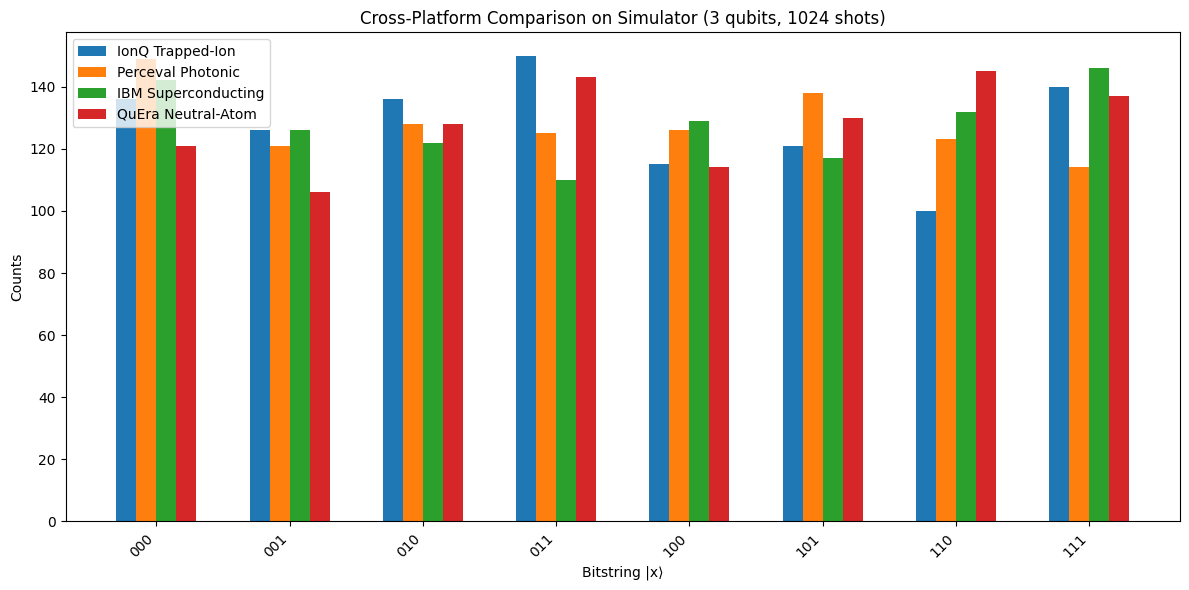

In [5]:
plot_multi_histogram([result_trapped_ion, result_photonic, result_super_conducting, result_neutral_atom], ["IonQ Trapped-Ion", "Perceval Photonic", "IBM Superconducting", "QuEra Neutral-Atom"], "Cross-Platform Comparison on Simulator (3 qubits, 1024 shots)")

## 4-Qubit Experiment on Ideal Simulator

The configuration is [0, 0, 0, 0]


/home/ugrads/majors/ttv27042004/CS4134/.venv/lib64/python3.11/site-packages/pennylane/devices/legacy_facade.py:177: PennyLaneDeprecationWarning: Setting shots on device is deprecated. Please use the `set_shots` transform on the respective QNode instead.
  warnings.warn(


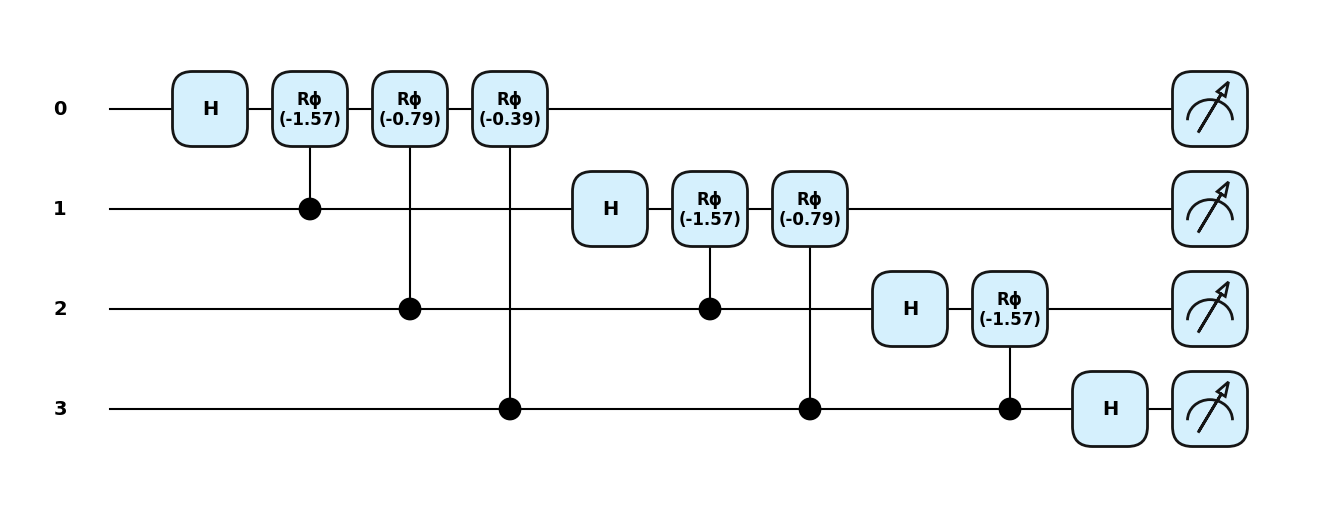

In [6]:
n = 4
config = [0] * n
shots = 1024

print(f"The configuration is {config}")

result_trapped_ion = qft_trapped_ion(n, config, shots)
result_photonic = qft_photonic(n, config, shots)
result_super_conducting = qft_super_conducting(n, config, shots)
result_neutral_atom = qft_neutral_atom(n, config, shots)

In [7]:
# printHistogramCounts(result_trapped_ion, "IonQ Trapped-ion")
# printHistogramCounts(result_photonic, "Perceval Photonic")
# printHistogramCounts(result_super_conducting, "QFT Result Distribution (IBM Superconducting)")
# printHistogramCounts(result_neutral_atom, "QFT Result Distribution (QuEra Neutral-Atom)")


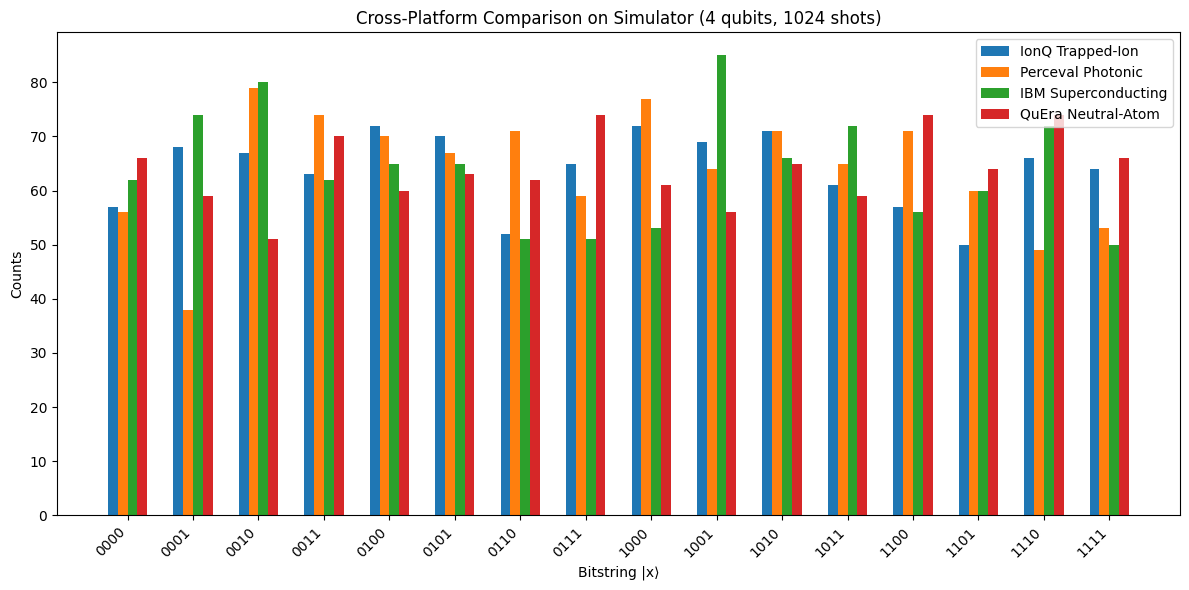

In [8]:
plot_multi_histogram([result_trapped_ion, result_photonic, result_super_conducting, result_neutral_atom], ["IonQ Trapped-Ion", "Perceval Photonic", "IBM Superconducting", "QuEra Neutral-Atom"], "Cross-Platform Comparison on Simulator (4 qubits, 1024 shots)")

## 3-Qubit Experiment on Noisy Model

In [9]:
n = 3
config = [0] * n
shots = 1024

print(f"The configuration is {config}")

result_trapped_ion = qft_trapped_ion_noisy(n, config, shots)
result_photonic = qft_photonic_noisy(n, config, shots)
result_super_conducting = qft_super_conducting(n, config, shots, noise=True)
result_neutral_atom = qft_neutral_atom_noisy(n, config, shots)

print(result_trapped_ion)
print(result_photonic)
print(result_super_conducting)
print(result_neutral_atom)

The configuration is [0, 0, 0]


/home/ugrads/majors/ttv27042004/CS4134/.venv/lib64/python3.11/site-packages/pennylane/devices/device_api.py:193: PennyLaneDeprecationWarning: Setting shots on device is deprecated. Please use the `set_shots` transform on the respective QNode instead.
  warnings.warn(


{np.str_('000'): np.int64(119), np.str_('001'): np.int64(130), np.str_('010'): np.int64(129), np.str_('011'): np.int64(128), np.str_('100'): np.int64(131), np.str_('101'): np.int64(147), np.str_('110'): np.int64(122), np.str_('111'): np.int64(118)}
{'000': 119, '001': 137, '010': 135, '011': 113, '100': 142, '101': 132, '110': 129, '111': 117}
{'000': 122, '001': 145, '010': 127, '011': 123, '100': 141, '101': 119, '110': 128, '111': 119}
{'000': 133, '001': 123, '010': 137, '011': 138, '100': 114, '101': 153, '110': 117, '111': 109}


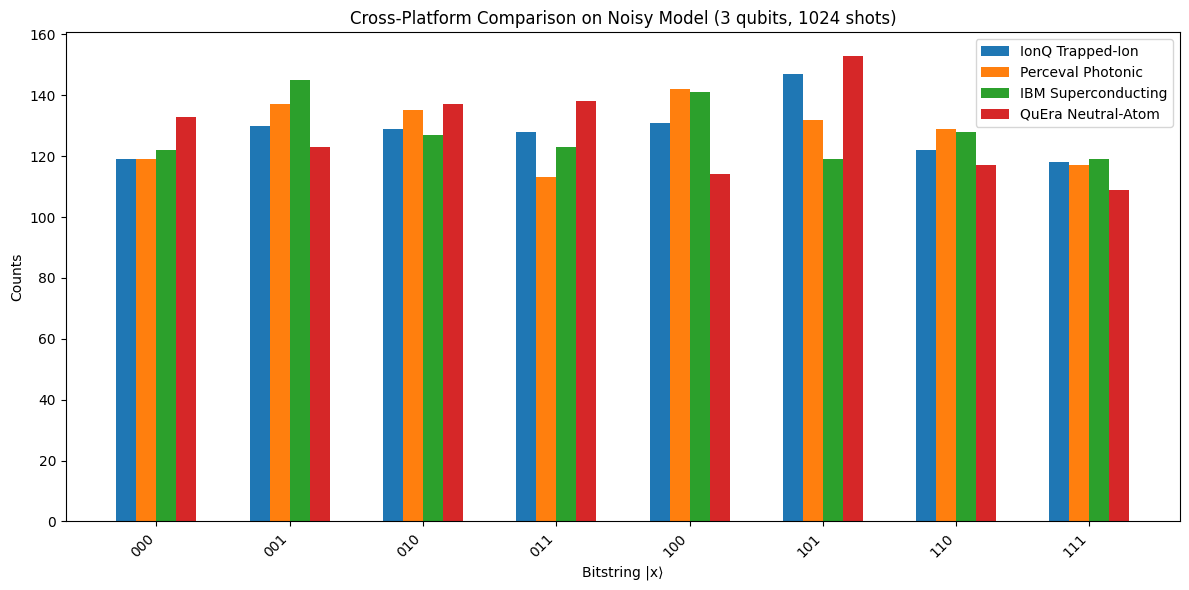

In [10]:
plot_multi_histogram([result_trapped_ion, result_photonic, result_super_conducting, result_neutral_atom], ["IonQ Trapped-Ion", "Perceval Photonic", "IBM Superconducting", "QuEra Neutral-Atom"], "Cross-Platform Comparison on Noisy Model (3 qubits, 1024 shots)")

## 4-Qubit Experiment on Noisy Model

__Note__: Since Perceval platform only allow up to 24 qumodes (in the middel between 4 to 5 qubits), we cannot run the experiment with 5 qubits.

In [ ]:
n = 4
config = [0] * n
shots = 1024

print(f"The configuration is {config}")

result_trapped_ion = qft_trapped_ion_noisy(n, config, shots)
result_photonic = qft_photonic_noisy(n, config, shots)
result_super_conducting = qft_super_conducting(n, config, shots, noise=True)
result_neutral_atom = qft_neutral_atom_noisy(n, config, shots)

print(result_trapped_ion)
print(result_photonic)
print(result_super_conducting)
print(result_neutral_atom)

The configuration is [0, 0, 0, 0]


/home/ugrads/majors/ttv27042004/CS4134/.venv/lib64/python3.11/site-packages/pennylane/devices/device_api.py:193: PennyLaneDeprecationWarning: Setting shots on device is deprecated. Please use the `set_shots` transform on the respective QNode instead.
  warnings.warn(


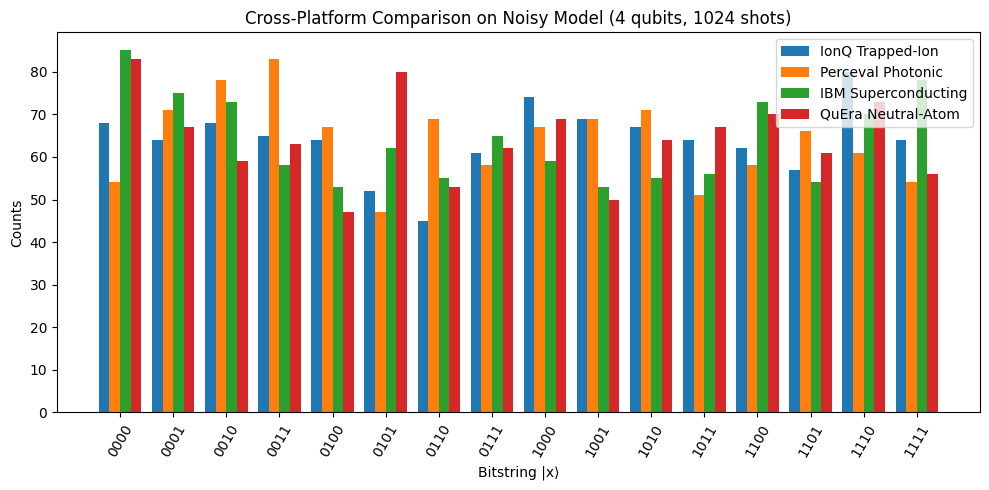

In [ ]:
plot_multi_histogram([result_trapped_ion, result_photonic, result_super_conducting, result_neutral_atom], ["IonQ Trapped-Ion", "Perceval Photonic", "IBM Superconducting", "QuEra Neutral-Atom"], "Cross-Platform Comparison on Noisy Model (4 qubits, 1024 shots)")